<a href="https://colab.research.google.com/github/joaovnogueira/introducao_pandas/blob/main/desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [ ]:
import pandas as pd



### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [ ]:
import pandas as pd

In [ ]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [ ]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [ ]:
df['Quartos'].mean()

2.481568707761622

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [ ]:
df_unico = df['Bairro'].unique()

### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

<Axes: ylabel='Bairro'>

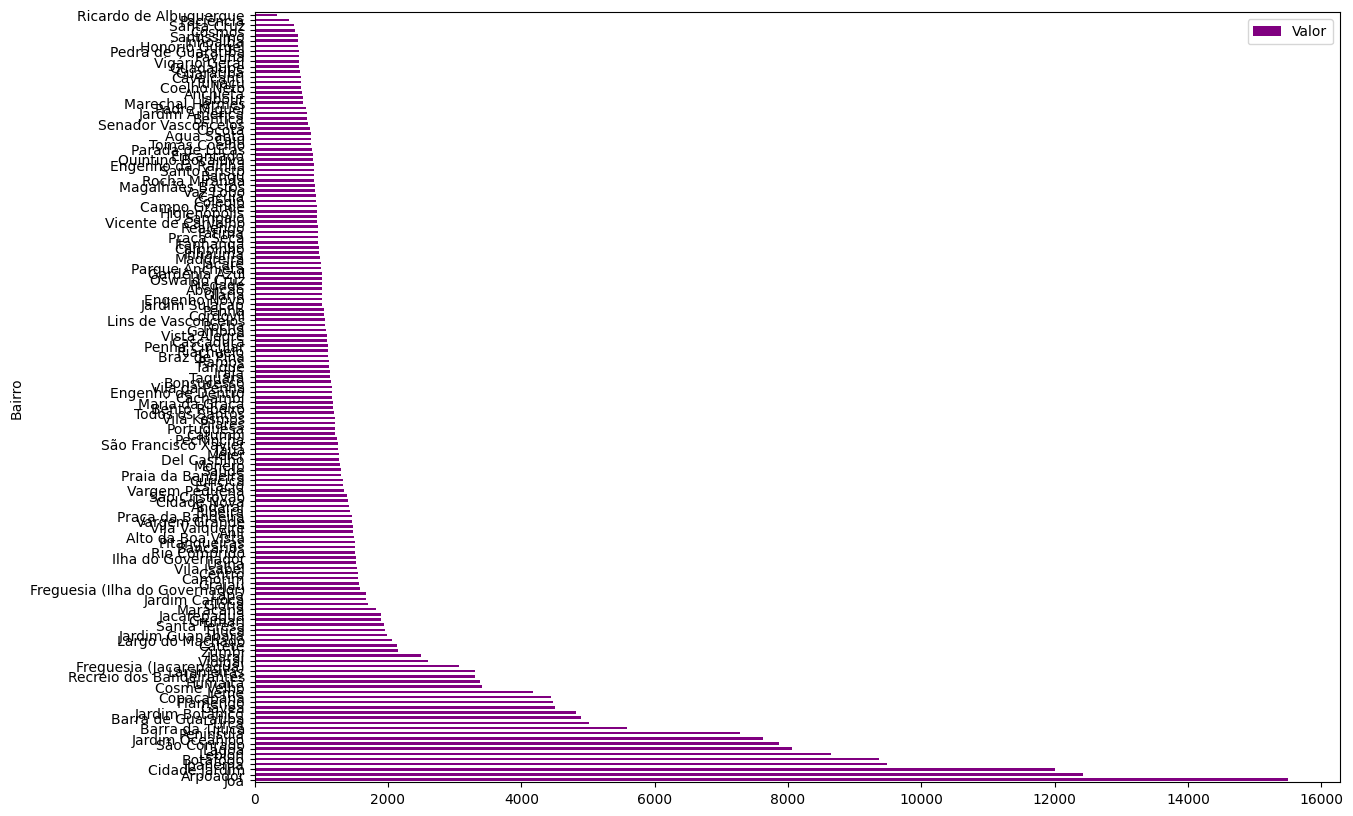

In [ ]:
df_preco_tipo = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor')

org = df_preco_tipo.sort_values(by='Valor', ascending=False)



### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

<Axes: xlabel='Preço', ylabel='Bairro'>

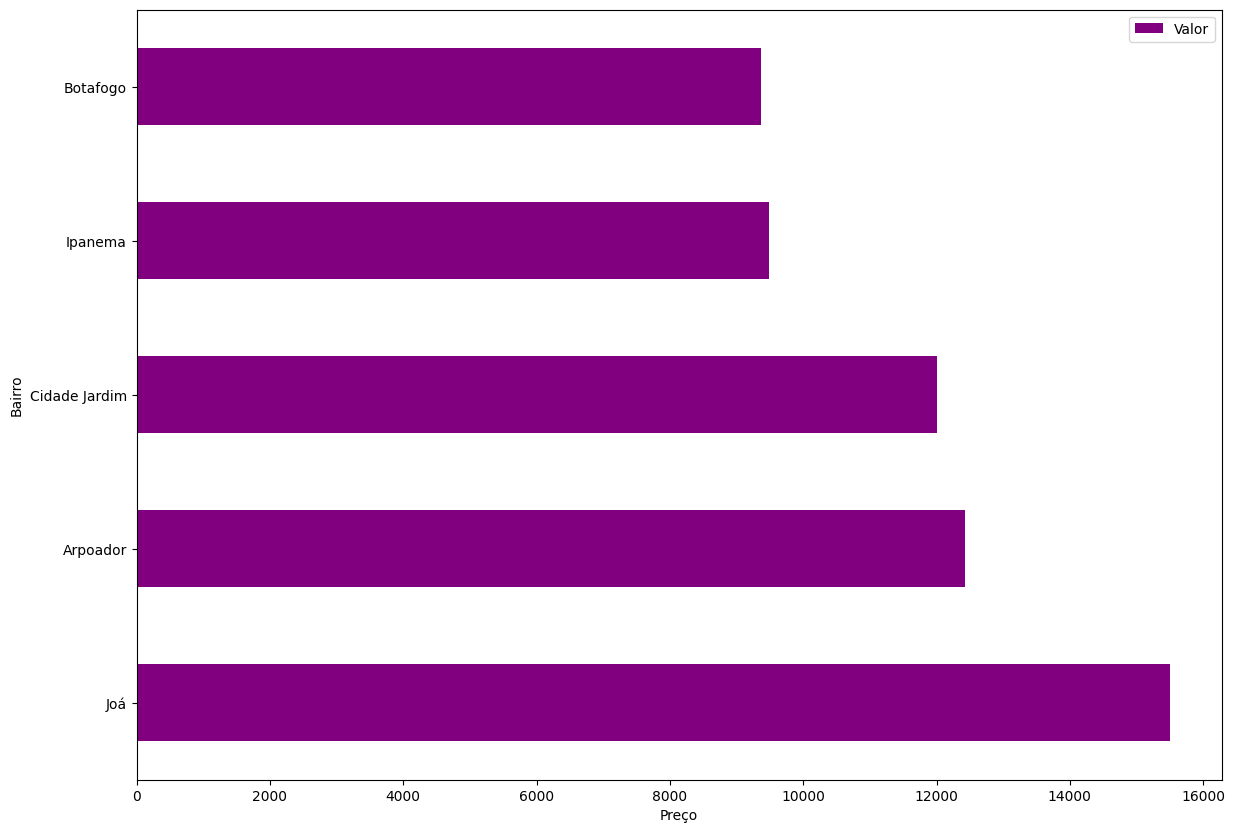

In [ ]:
top5 = org.head(5)
top5.plot(kind='barh', figsize=(14,10), color="purple", xlabel="Preço", ylabel="Bairro")


## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url, sep=';')

### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [ ]:
dados = pd.read_csv(url, sep=',')
dados.head()
dados.isnull()

,Nome,Idade,Notas,Aprovado
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [ ]:
dados.isnull().sum()

,0
Nome,0
Idade,0
Notas,6
Aprovado,0


In [ ]:
dados = dados.fillna(0)
dados.isnull().sum()

,0
Nome,0
Idade,0
Notas,0
Aprovado,0


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [ ]:
alicecarlos = dados.query( 'Nome== "Alice" | Nome=="Carlos" ').index

In [ ]:
alicecarlos

Index([], dtype='int64')

In [ ]:
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
9,Vitor,28,NaN,False
10,Daniel,21,NaN,False
11,Igor,24,4.5,False


In [ ]:
dados.reset_index(drop=True)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Vitor,28,NaN,False
8,Daniel,21,NaN,False
9,Igor,24,4.5,False


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [ ]:
alunosReprovadosIndex = dados.query( 'Aprovado == False').index

In [ ]:
dados.drop(alunosReprovadosIndex, axis=0, inplace=True)

KeyError: '[1, 2, 3, 5, 9, 10, 11, 14, 16] not found in axis'

In [ ]:
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [ ]:
dados.to_csv('alunos_aprovados.csv')

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [ ]:
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [ ]:
dados.replace()
dados['Notas'] = dados['Notas'].replace({'7' : '8'})
dados


<ipython-input-61-9c6ac70e7ff4>:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  dados.replace()


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url, sep=',')
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [ ]:
dados['Pontos_extras'] = dados['Notas'] * 0.4
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,NaN,False,NaN
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,NaN,False,NaN


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [ ]:
dados['Notas_finais'] = dados['Notas'] + dados['Pontos_extras']
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.00,10.50
1,Ana,18,NaN,False,NaN,NaN
2,Cátia,27,2.5,False,1.00,3.50
3,Denis,18,5.0,False,2.00,7.00
4,Beto,21,10.0,True,4.00,14.00
5,Bruna,23,NaN,False,NaN,NaN
6,Dara,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,True,2.40,8.40
8,Alice,35,5.6,False,2.24,7.84
9,Vitor,28,NaN,False,NaN,NaN


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [ ]:
dados['Aprovado_final'] = dados['Notas_finais'].apply(lambda x: True if x > 6 else False)
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,NaN,False,NaN,NaN,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,NaN,False,NaN,NaN,False


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [ ]:
indexAlunos = dados.query('Aprovado == Aprovado_final').index
dados.drop(indexAlunos, axis=0, inplace=True)
dados


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
